<a href="https://colab.research.google.com/github/MervalRaider/Varios/blob/main/GGAL_Y_RIESGO_PAIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [9]:
#Para actualizar cargar en el entorno de ejecución el archivo actualizado de rava
rp = pd.read_csv('RIESGO PAIS - Cotizaciones historicas.csv', index_col = 'fecha',sep=',',usecols=['fecha','cierre'])
ggal = yf.download(['GGAL'], ignore_tz=True)['Adj Close']
rp.index = pd.to_datetime(rp.index,dayfirst=True)
df = rp.join(ggal)
df.dropna(inplace=True)

df.columns = ['Riesgo País','GGAL']

#Creo una columna "color" para cambiar el color del dato del día
df['color'] = np.where(df.index == df.index[-1],'red','green')
df

[*********************100%***********************]  1 of 1 completed


,Riesgo País,GGAL,color
fecha,,,
2000-07-25,639,15.213404,green
2000-07-26,644,15.213404,green
2000-07-27,652,15.213404,green
2000-07-28,654,15.104742,green
2000-07-31,650,15.376407,green
...,...,...,...
2023-01-13,1980,13.040000,green
2023-01-17,1881,13.760000,green
2023-01-18,1807,12.400000,green


Text(3500, 40, '@MervalRaider')

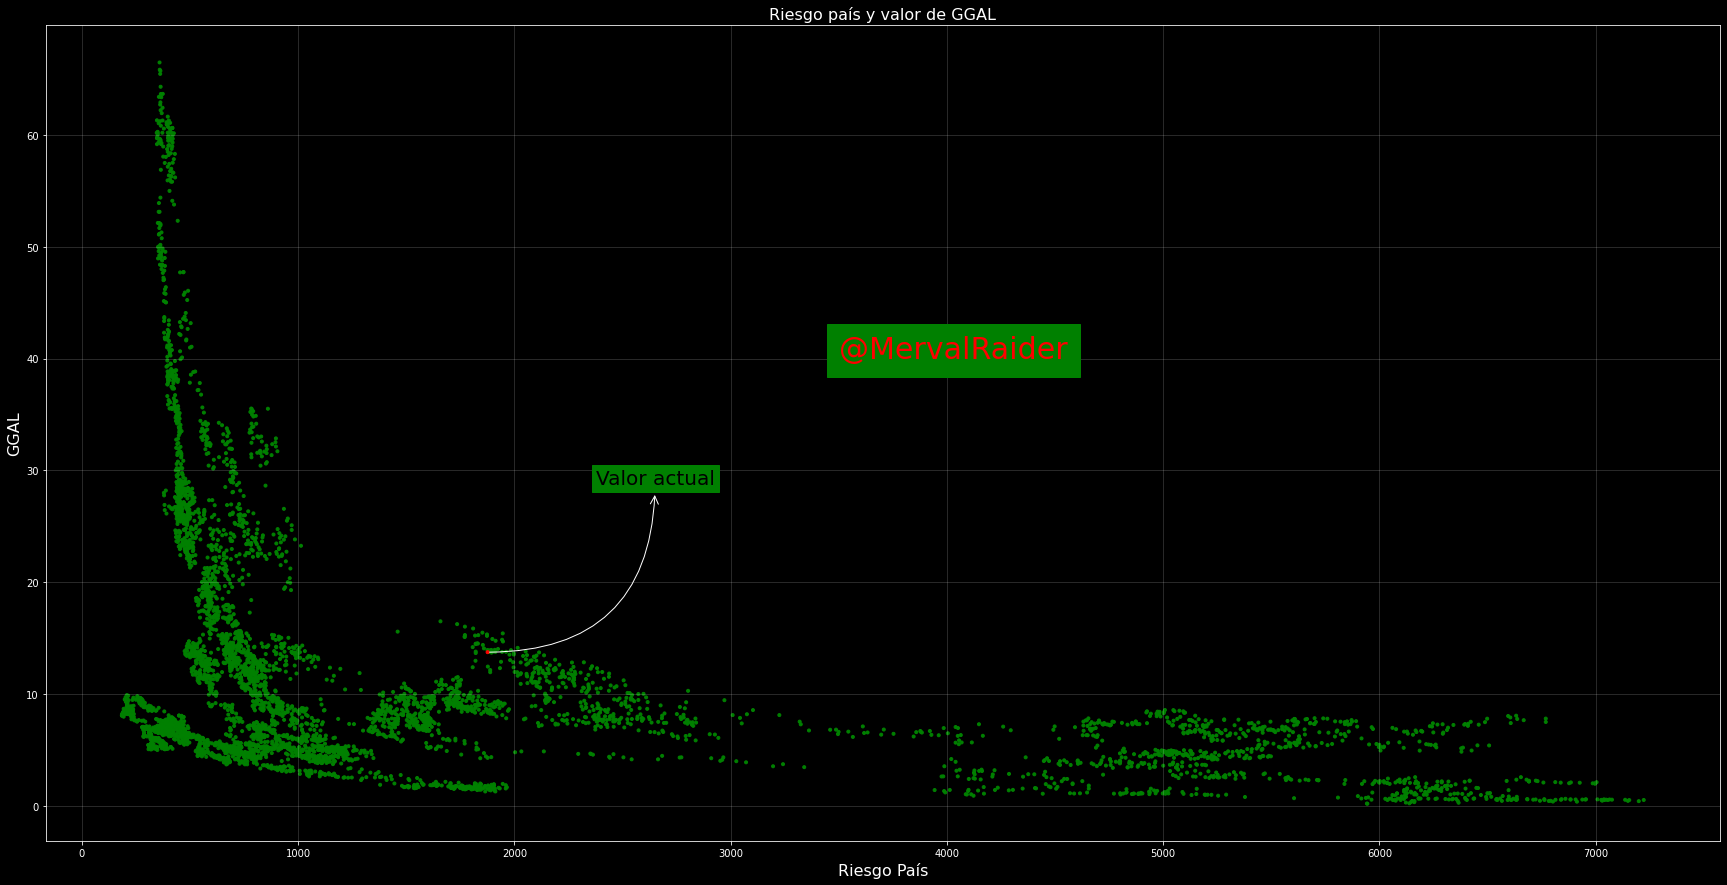

In [10]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(30,15))
ax.scatter(df['Riesgo País'],df['GGAL'],marker='.',c=df.color.values)
ax.set_title('Riesgo país y valor de GGAL', fontsize=16)
ax.grid(alpha=0.2)
ax.set_ylabel('GGAL', fontsize=16)
ax.set_xlabel('Riesgo País', fontsize=16)
#Creo una flecha que sale del punto del día para informar que ese es el valor actual
ax.annotate('Valor actual',xy=[df['Riesgo País'][-1],df['GGAL'][-1]],arrowprops={'arrowstyle':'<-','connectionstyle':'angle 3'},xytext=[df['Riesgo País'][-1]+500,df['GGAL'][-1]+15],fontsize=20,
            backgroundcolor='green', color='black')
#Marca de agua
ax.text(3500,40,'@MervalRaider',backgroundcolor='green', color='red',fontsize=30)
